# Simple Logistic Regression Approach

### Notebook Contents:

- Loading libraries and datasets
    1. Exploring the data variables
- Exploratory Data analysis
    1. Exploring the spread and center of variables
    2. Exploring the survival of passengers
- Feature Engineering
    1. Imputing missing variables
    2. Converting Categorical variables
- Training Model and predictions
    1. Logistic Regression
    
### To do:
 - Improve the models

### Import Libraries

In [1]:
import numpy as np    # linear algebra
import pandas as pd   # data processing/feature engineering
import matplotlib.pyplot as plt       # Data visualization
import seaborn as sns                 # Enhanced Data Visualization

%matplotlib inline

from sklearn.linear_model import LogisticRegression # Logistic Regression Model

### Load Data

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

### Shape, head, Center

#### Training data


In [3]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Test Data

In [6]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The training data and test data have some missing values in several columns. Let's explore them further and some other properties/relations of variables with some visual plots.

## Exploratory Data Analysis

### Missing data

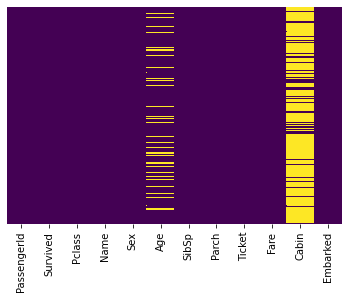

In [9]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### How many passengers survived ?

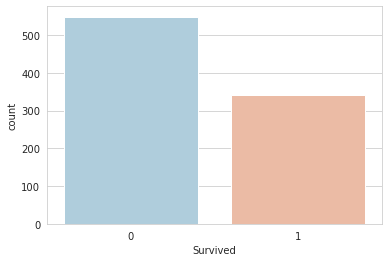

In [10]:
sns.set_style('whitegrid')
sns.countplot(train_df['Survived'], palette='RdBu_r')

### Actual count of passengers survival

In [11]:
survived = train_df[train_df['Survived']==1]['Survived'].sum()
survived

342

### How many males and females amongst survivals ?

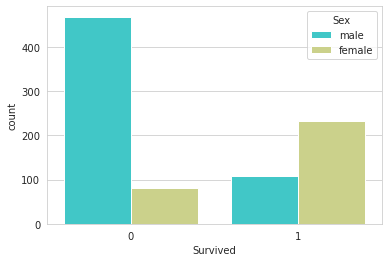

In [12]:
sns.countplot(train_df['Survived'], hue=train_df['Sex'], palette='rainbow')

### Survival according to the class

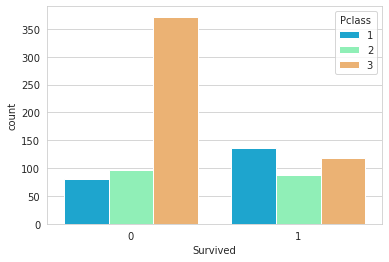

In [13]:
sns.countplot(train_df['Survived'], hue=train_df['Pclass'], palette='rainbow')

### Overall Age distribution of passengers on Titanic

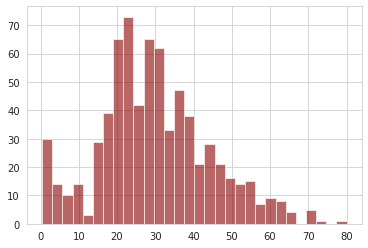

In [14]:
train_df['Age'].hist(color='darkred', bins=30, alpha=0.6)

### Fare distribution among the passengers

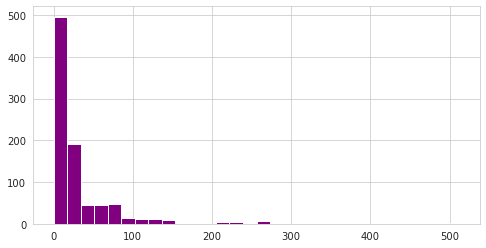

In [15]:
train_df['Fare'].hist(color='purple', bins=30, figsize=(8,4))

### Age distribution according to class

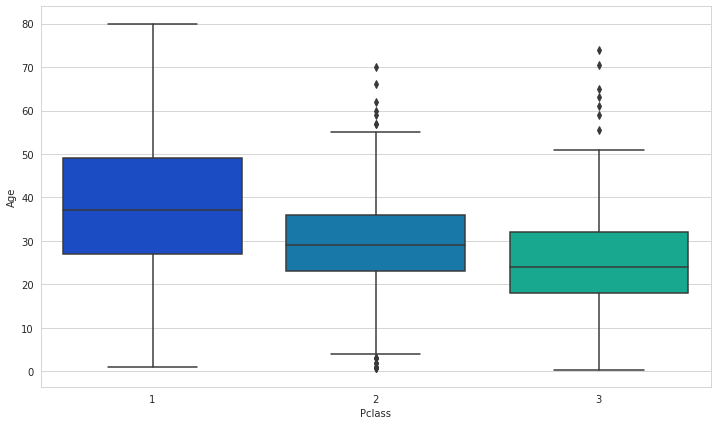

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x=train_df['Pclass'], y=train_df['Age'], palette='winter')

### Fare distribution according to class

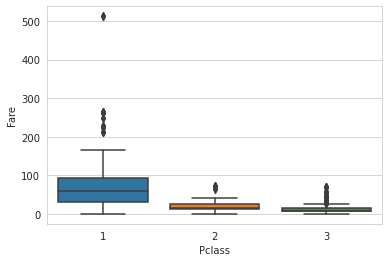

In [17]:
sns.boxplot(x=train_df['Pclass'], y=train_df['Fare'])

## Feature Engineering

### Fill Missing Values

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 'Age' shall be imputed with mean values according to class since it is a numerical variable. 
- 'Cabin' shall be removed as it is not really required.
- 'Embarked' shall be imputed with mode values as it is a categorical variable. 

#### Mean Age per class

In [19]:
meanAge = train_df.groupby('Pclass').mean()['Age']
meanAge

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
# Defining a function for calculating mean age
def imputeAge(cols):
    Age = cols[0]
    Class = cols[1]
    
    if pd.isnull(Age):
        
        if Class == 1:
            return meanAge[1]
        elif Class == 2:
            return meanAge[2]
        else:
            return meanAge[3]
    else:
        return Age        

In [21]:
# Applying above function in Age column
train_df['Age'] = train_df[['Age', 'Pclass']].apply(imputeAge, axis=1)

#### Drop the 'Cabin' variable

In [22]:
train_df.drop('Cabin', axis=1, inplace=True)

#### Impute 'Embarked' variable

In [23]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [24]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Test Data Imputations

In [25]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- 'Age' variable shall be imputed with mean values according to class.
- 'Fare' variable shall be imputed with mean value according to class.
- 'Cabin' and all variables which were removed from training data shall be dropped from test data as well.

#### Mean Age according to class (Test data)

In [26]:
meanAge_test = test_df.groupby('Pclass').mean()['Age']
meanAge_test

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [27]:
def imputAge_test(cols):
    Age = cols[0]
    Class = cols[1]
    
    if pd.isnull(Age):
        if Class == 1:
            return meanAge_test[1]
        elif Class == 2:
            return meanAge_test[2]
        else:
            return meanAge_test[3]
    else:
        return Age

In [28]:
test_df['Age'] = test_df[['Age', 'Pclass']].apply(imputAge_test, axis=1)

### Fare imputation (Test data)

In [29]:
meanFare_test = test_df.groupby('Pclass').mean()['Fare']
meanFare_test

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [30]:
# Check the number of missing values
test_df['Fare'].isnull().sum()

1

#### Check the class of passenger with missing 'Fare'

In [31]:
test_df[test_df['Fare'].isnull() == True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [32]:
test_df['Fare'] = test_df['Fare'].fillna(meanFare_test[3])

#### Drop the 'Cabin' Variable

In [33]:
test_df.drop('Cabin',axis=1, inplace=True)

In [34]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting the Categorical Variables

- Creating dummy variables for 'Sex' and 'Embarked'.
- 'PassengerId' , 'Name', 'ticket' shall be dropped.

In [35]:
sex = pd.get_dummies(train_df['Sex'], drop_first=True)
embark = pd.get_dummies(train_df['Embarked'], drop_first=True)

In [36]:
train_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis =1, inplace=True)

In [37]:
train_df = pd.concat([train_df, sex, embark], axis=1)

In [38]:
train_df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


### Test data conversions

In [39]:
sex = pd.get_dummies(test_df['Sex'], drop_first=True)
embark = pd.get_dummies(test_df['Embarked'], drop_first=True)

In [40]:
test_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1, inplace=True)

In [41]:
test_df.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000


In [42]:
test_df = pd.concat([test_df, sex, embark], axis =1)

In [43]:
test_df.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1


### Model preprocessing

In [44]:
X_train = train_df.drop(['Survived','PassengerId'], axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1)

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Model Building and Training

### Creating an instance of logistic model

In [45]:
logmodel = LogisticRegression(max_iter=150)

#### Fitting the model on training data

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=150)

### Predicting Survival in test data

In [47]:
predictions = logmodel.predict(X_test)

### File Submission

In [48]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
